In [1]:
import pandas as pd
import numpy as np

# IMPORTING THE DATASET

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- TOTAL CHARGES ARE MY TARGET VARIABLE AND OTHER COLUMNS ARE MY INPUT VARIABLES

# CHECKING DATATYPES OF THE COLUMNS

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- AS SHOWN NO NULL VALUES PRESENTED

- SINCE ITS A REGRESSION PROBLEM AND OBJECT DATATYPE IS NOT APPROPRIATE FOR THE TARGET VARIABLE, IT SHOULD BE CHANGED TO FLOAT

In [9]:
df['TotalCharges'].nunique()

6531

In [10]:
df.shape

(7043, 21)

In [12]:
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


- THERE ARE 11 ROWS WHERE VOID SPACES ARE PRESENT, HENCE REPLACING IT WITH NAN VALUES

In [13]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan)

In [14]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- CONVERTING DATATYPE FROM OBJECT TO FLOAT AND REMOVING NAN VALUES 

In [16]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [17]:
df.TotalCharges.dtypes

dtype('float64')

In [18]:
np.mean(df["TotalCharges"])

2283.3004408418697

In [20]:
df["TotalCharges"]=df["TotalCharges"].fillna(np.mean(df["TotalCharges"]))

In [21]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# VISUALIZATION OF THE DATA

In [29]:
feature_visualization=df[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']].copy()

Male      3555
Female    3488
Name: gender, dtype: int64


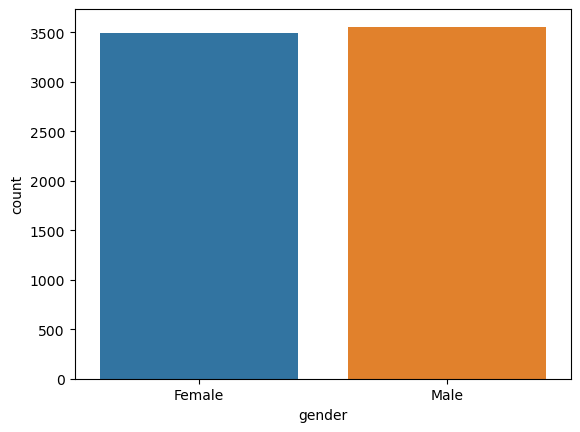

In [30]:
import seaborn as sns

ax=sns.countplot(x="gender",data=feature_visualization)
print(feature_visualization["gender"].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


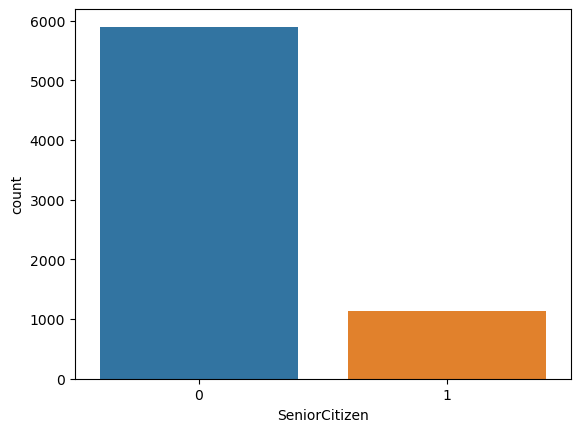

In [31]:
ax=sns.countplot(x="SeniorCitizen",data=feature_visualization)
print(feature_visualization["SeniorCitizen"].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64


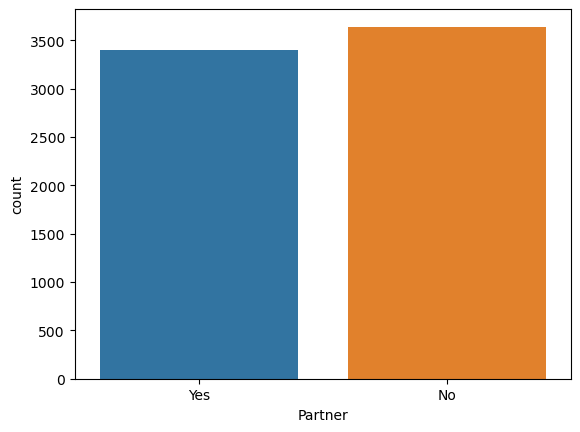

In [32]:
ax=sns.countplot(x="Partner",data=feature_visualization)
print(feature_visualization["Partner"].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


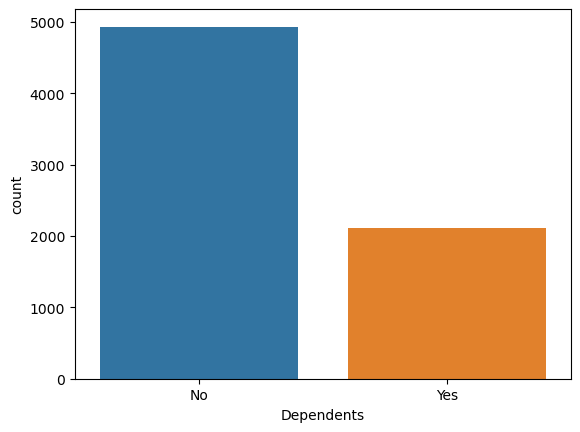

In [33]:
ax=sns.countplot(x="Dependents",data=feature_visualization)
print(feature_visualization["Dependents"].value_counts())

Yes    6361
No      682
Name: PhoneService, dtype: int64


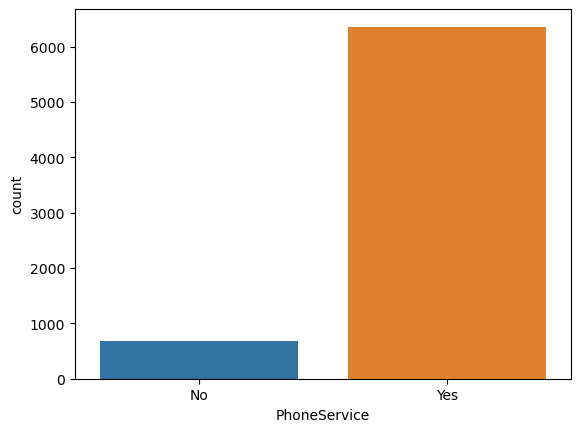

In [35]:
ax=sns.countplot(x="PhoneService",data=feature_visualization)
print(feature_visualization["PhoneService"].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


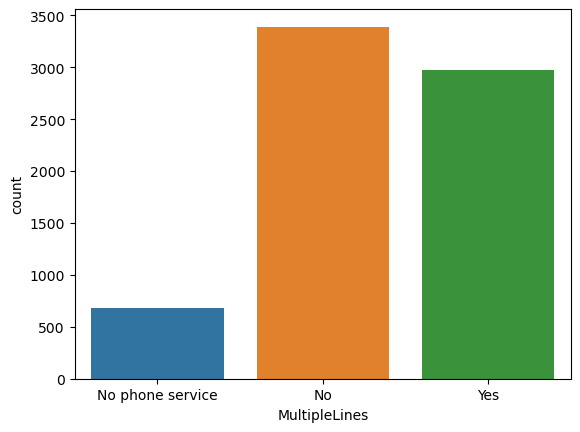

In [36]:
ax=sns.countplot(x="MultipleLines",data=feature_visualization)
print(feature_visualization["MultipleLines"].value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


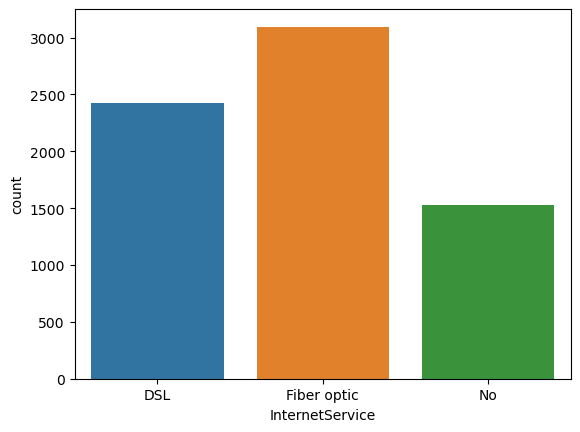

In [37]:
ax=sns.countplot(x="InternetService",data=feature_visualization)
print(feature_visualization["InternetService"].value_counts())

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


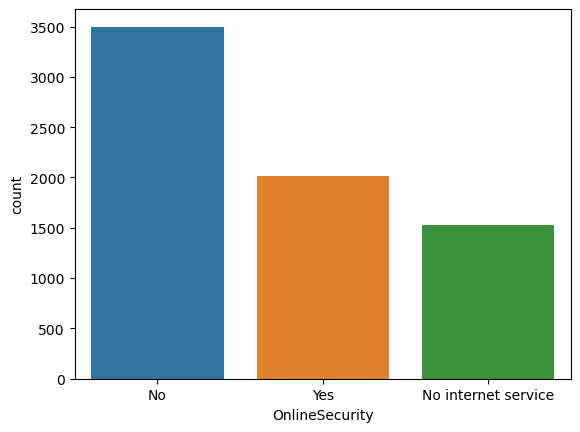

In [38]:
ax=sns.countplot(x="OnlineSecurity",data=feature_visualization)
print(feature_visualization["OnlineSecurity"].value_counts()) 

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


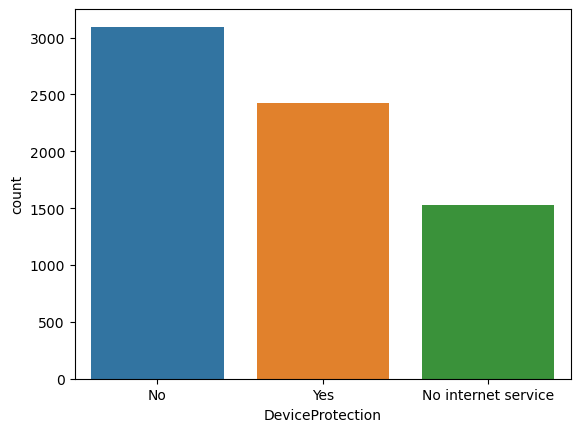

In [39]:
ax=sns.countplot(x="DeviceProtection",data=feature_visualization)
print(feature_visualization["DeviceProtection"].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


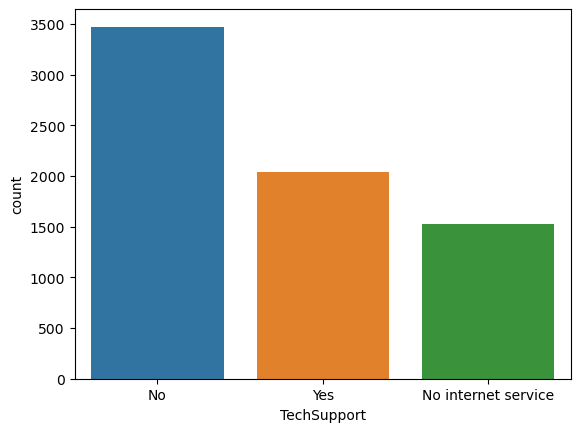

In [40]:
ax=sns.countplot(x="TechSupport",data=feature_visualization)
print(feature_visualization["TechSupport"].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


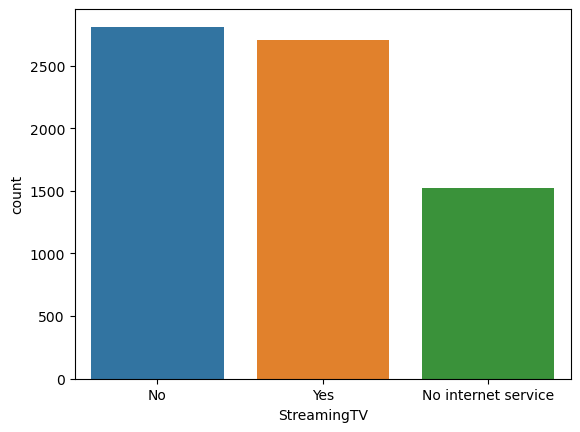

In [41]:
ax=sns.countplot(x="StreamingTV",data=feature_visualization)
print(feature_visualization["StreamingTV"].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


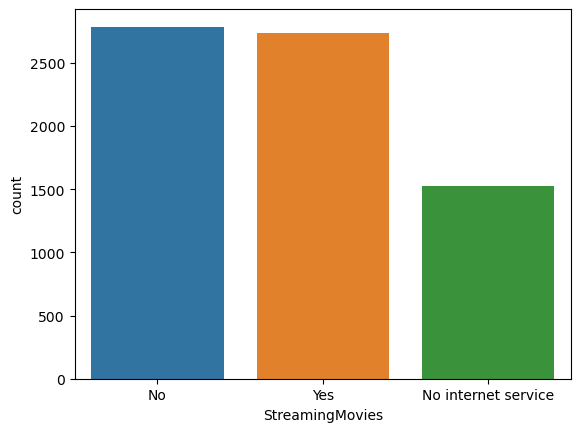

In [42]:
ax=sns.countplot(x="StreamingMovies",data=feature_visualization)
print(feature_visualization["StreamingMovies"].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


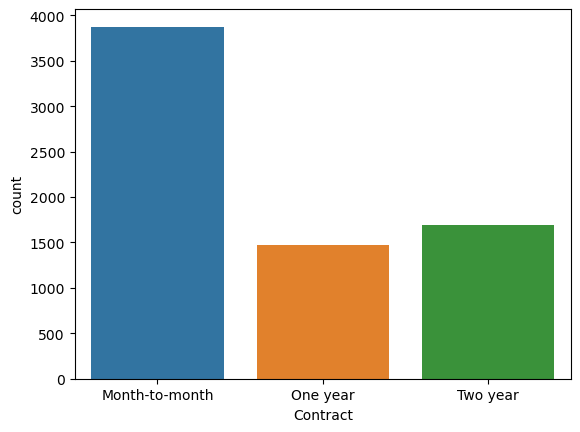

In [43]:
ax=sns.countplot(x="Contract",data=feature_visualization)
print(feature_visualization["Contract"].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


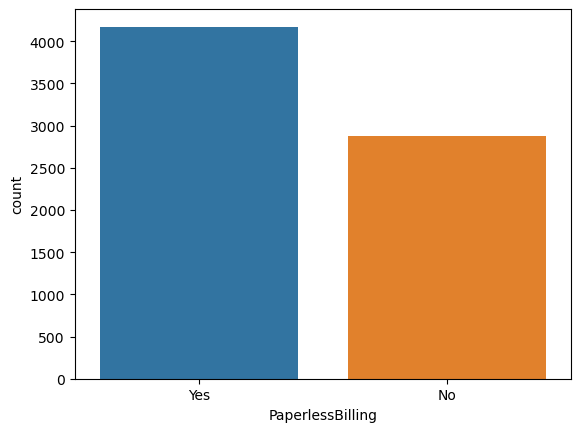

In [45]:
ax=sns.countplot(x="PaperlessBilling",data=feature_visualization)
print(feature_visualization["PaperlessBilling"].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


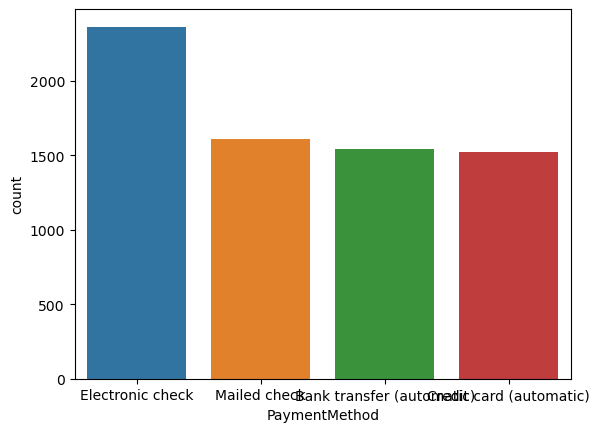

In [46]:
ax=sns.countplot(x="PaymentMethod",data=feature_visualization)
print(feature_visualization["PaymentMethod"].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


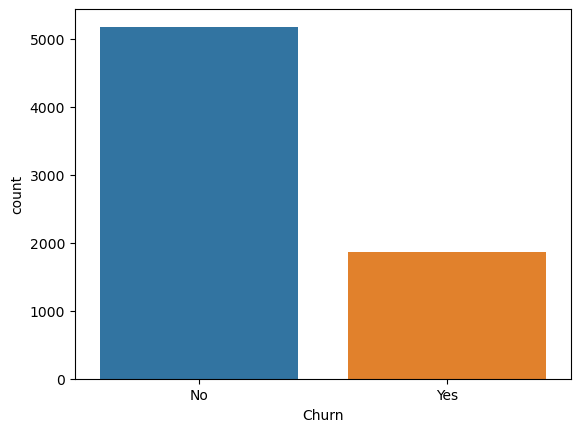

In [47]:
ax=sns.countplot(x="Churn",data=feature_visualization)
print(feature_visualization["Churn"].value_counts())

- MAKING DATAFRAME FOR ORDINAL DATA

In [51]:
feature_visualization_ordinal=df[["customerID",'tenure']].copy()

- RELATIONSHIP BTW SENIORCITIZEN AND TENURE

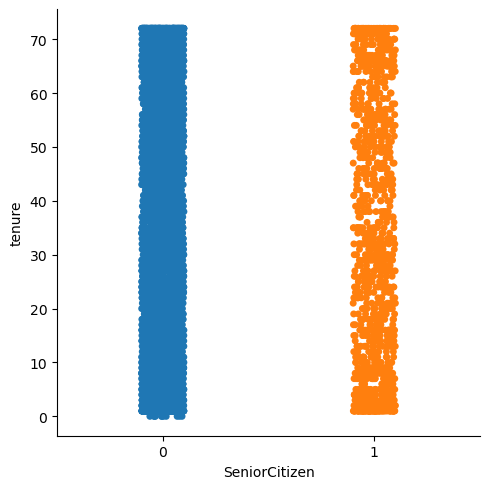

In [52]:
sns.catplot(x="SeniorCitizen",y="tenure",data=df)

- DISTRIBUION FOR THE FLOAT TYPE COLUMN 

In [53]:
df_feature_continuous=df[["MonthlyCharges","TotalCharges"]].copy()

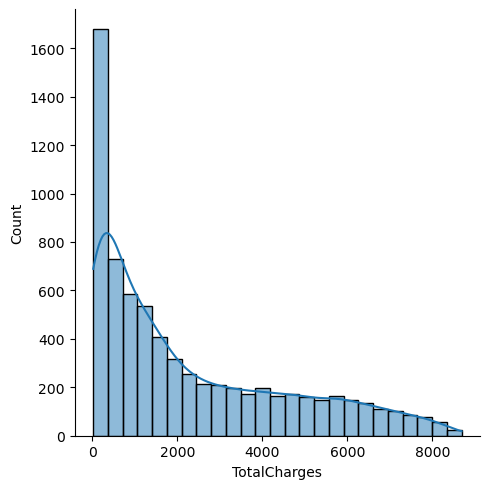

In [55]:
sns.displot(df_feature_continuous["TotalCharges"],kde=True)

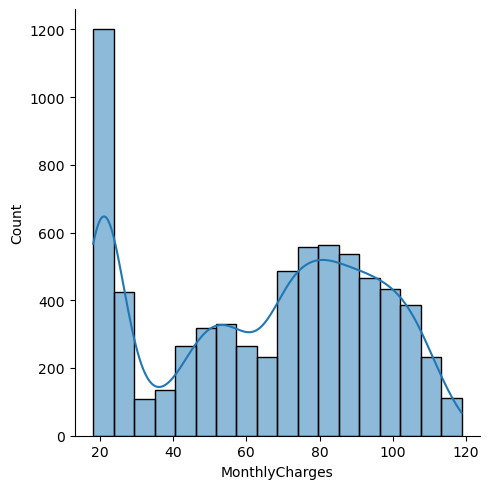

In [56]:
sns.displot(df_feature_continuous["MonthlyCharges"],kde=True)

# ENCODING OF DATAFRAME

In [60]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [61]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [62]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [63]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<AxesSubplot:>

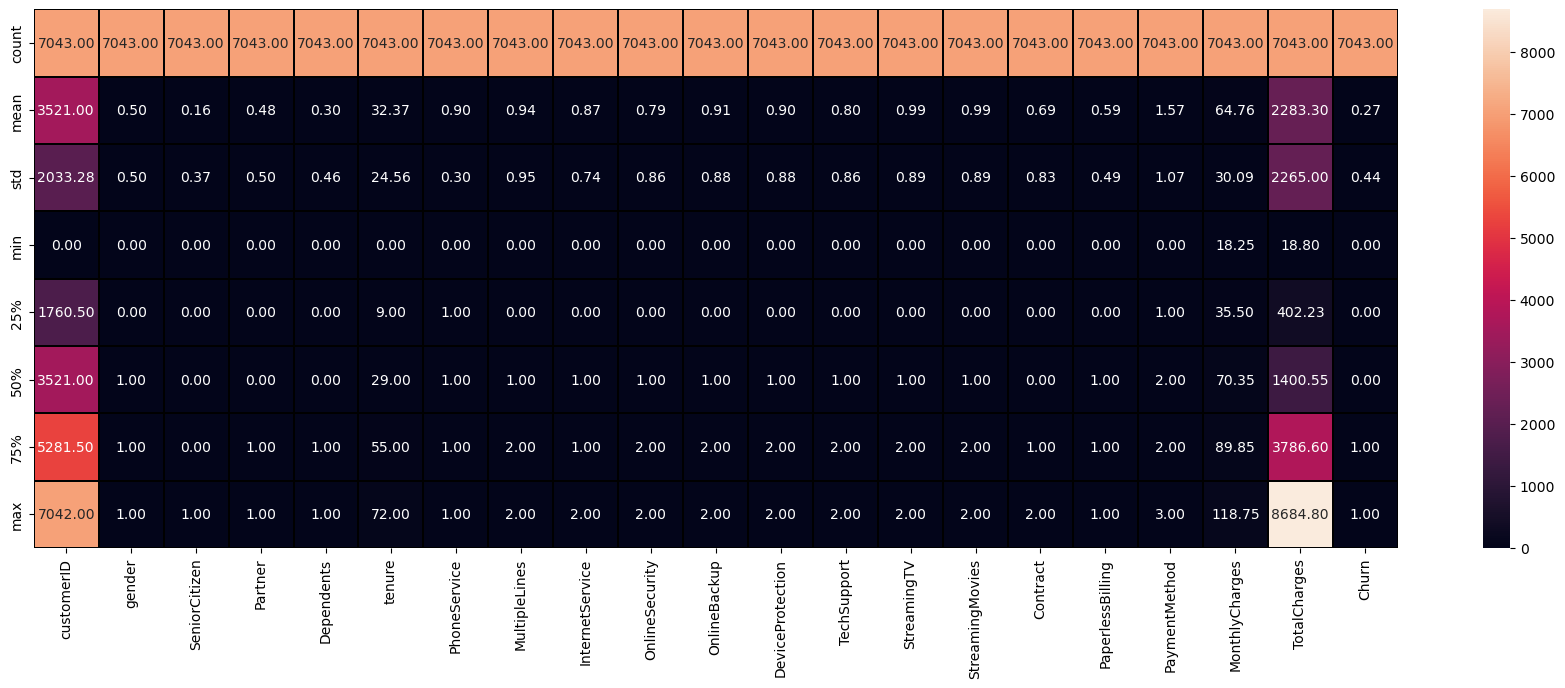

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

# CORRELATION OF COLUMNS WITH THE TARGET COLUMNS

In [65]:
df.corr()['TotalCharges'].sort_values()

PaymentMethod      -0.330151
Churn              -0.199428
InternetService    -0.175429
customerID         -0.000270
gender              0.000048
Dependents          0.064535
SeniorCitizen       0.102395
PhoneService        0.112851
PaperlessBilling    0.157676
OnlineSecurity      0.254308
TechSupport         0.276713
Partner             0.318812
OnlineBackup        0.375362
DeviceProtection    0.388864
StreamingTV         0.392291
StreamingMovies     0.397909
Contract            0.449511
MultipleLines       0.452883
MonthlyCharges      0.650468
tenure              0.824757
TotalCharges        1.000000
Name: TotalCharges, dtype: float64

- TENURE HAS THE HIGH CORRELATION WITH THE TARGET VARIABLE

<AxesSubplot:>

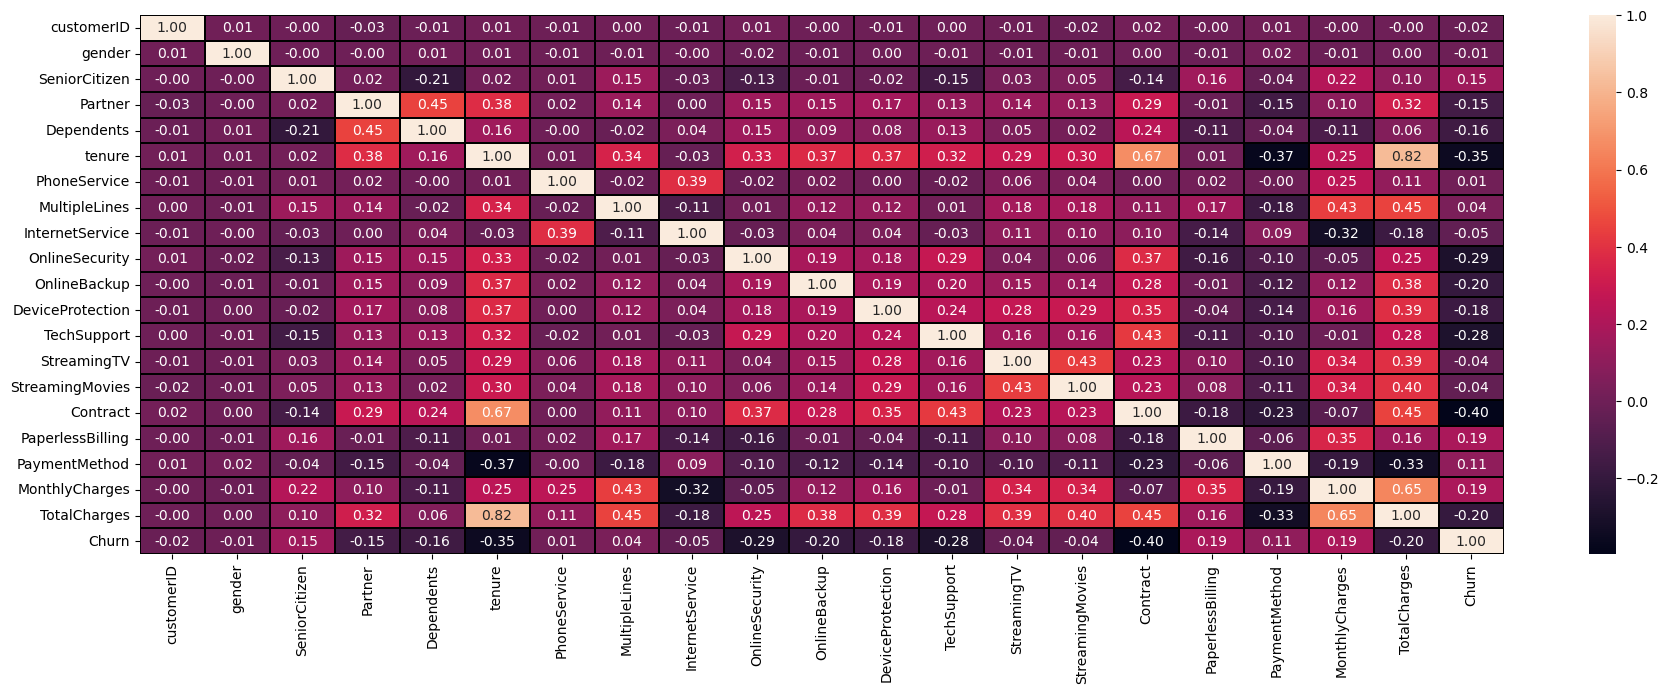

In [67]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

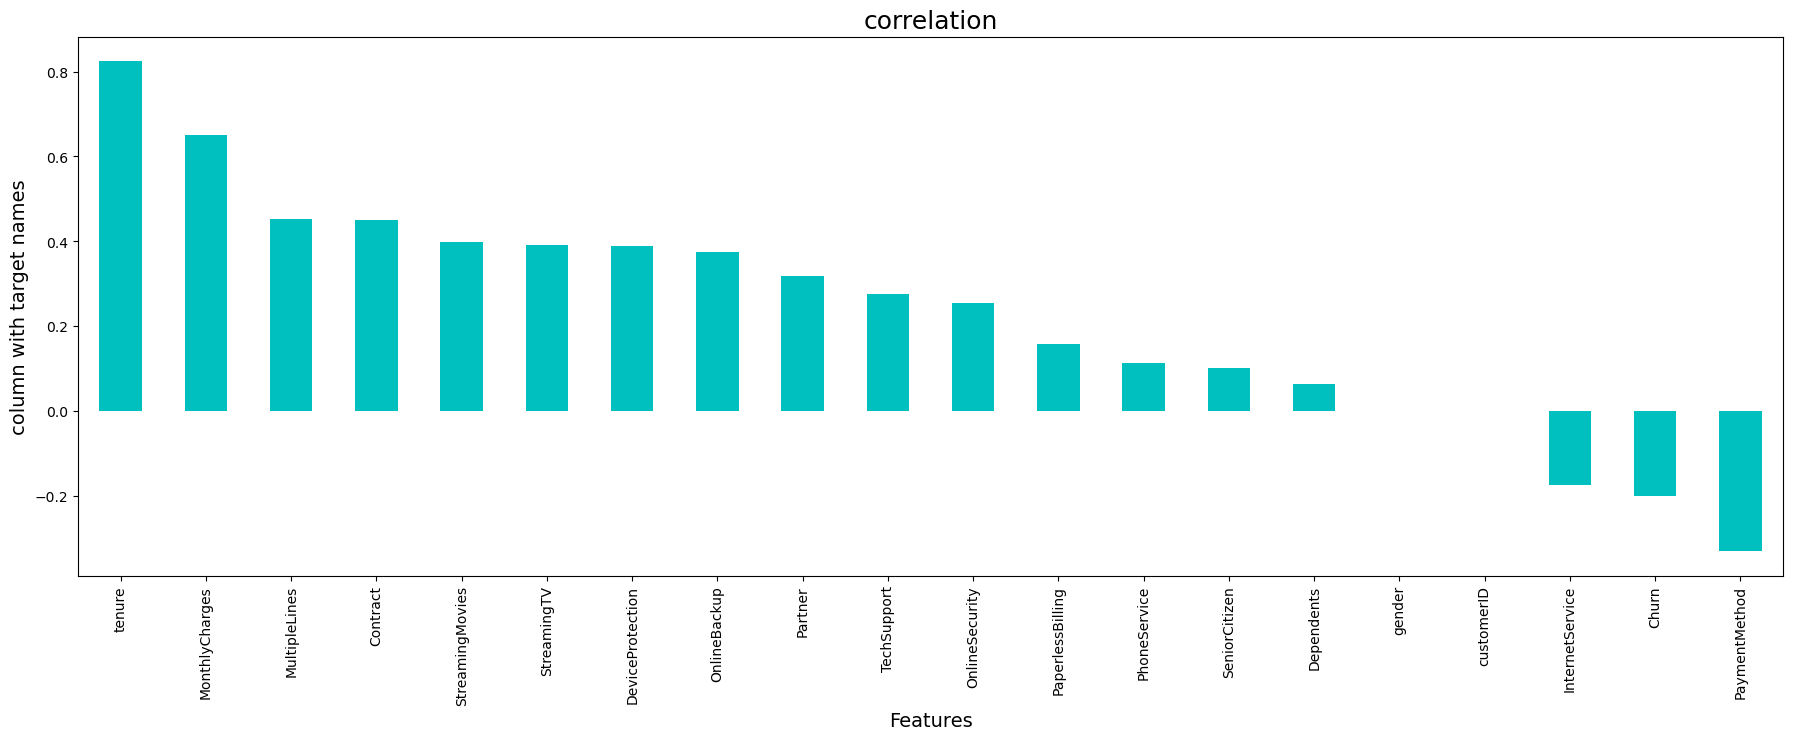

In [70]:
plt.figure(figsize=(22,7))
df.corr()["TotalCharges"].sort_values(ascending=False).drop(['TotalCharges']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

- WE CAN FIND OUT THE CORRELATION WITH THE TARGET VARIABLE THOUGH THE BARPLOT

- CHECKING THE SKWENESS

In [72]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

- KEEPING THE THRESHOLD +/-0.5 , THERE IS NO SKEWNESS

# CHECKING THE OUTLIERS

- CHECKING OUTLIERS IN INT AND FLOAT COLUMNS 

<AxesSubplot:>

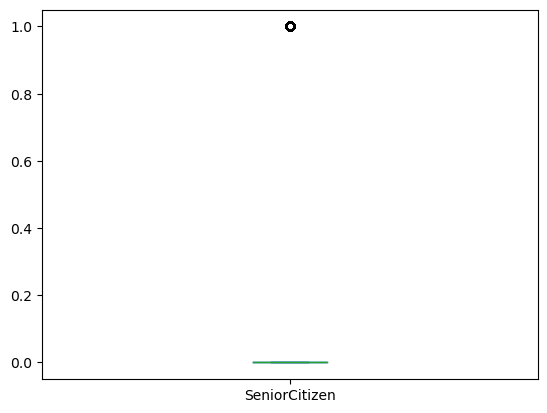

In [73]:
df['SeniorCitizen'].plot.box()

<AxesSubplot:>

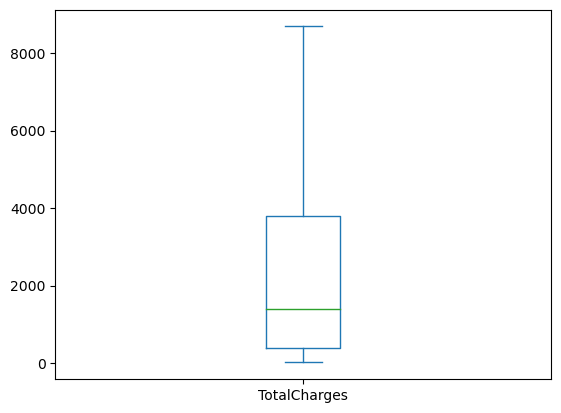

In [74]:
df['TotalCharges'].plot.box()

<AxesSubplot:>

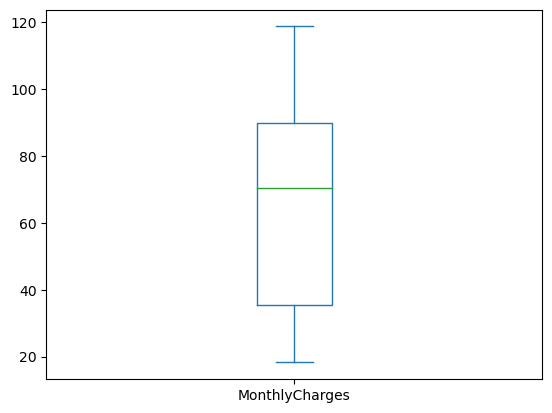

In [75]:
df['MonthlyCharges'].plot.box()

In [76]:
from scipy.stats import zscore 
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)  #**************** considering outliers *******************

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [78]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,1419.40,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [80]:
df_new_z.shape

(6361, 21)

In [82]:
Data_loss=((7043-6361)/7043)*100

In [83]:
Data_loss

9.683373562402386

- SINCE THE DATA LOSS IS LESS THAT 10% IT CAN BE CONSIDERED, THUS WE WILL NOT REMOVE THE OUTLIERS

- SEPERATING THE COLUMNS INTO FEATURES AND TARGETS

In [90]:
features=df.drop("TotalCharges",axis=1)
target=df['TotalCharges']

- SCALING THE DATA USING MIN-MAX SCALER

In [101]:
from sklearn.preprocessing import MinMaxScaler
nms=MinMaxScaler()
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split

In [92]:
import warnings
warnings.filterwarnings('ignore')

In [94]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"at random state {i}, the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"at random state {i}, the testing accuracy is:- {r2_score(target_test,pred_test)}")
          

at random state 0, the training accuracy is:- 0.9058706722803965
at random state 0, the testing accuracy is:- 0.8977317673785854
at random state 1, the training accuracy is:- 0.9052277082152647
at random state 1, the testing accuracy is:- 0.9003132716690803
at random state 2, the training accuracy is:- 0.9056858398935238
at random state 2, the testing accuracy is:- 0.8984735750686543
at random state 3, the training accuracy is:- 0.9044956724241888
at random state 3, the testing accuracy is:- 0.9032713403489678
at random state 4, the training accuracy is:- 0.9031354749784841
at random state 4, the testing accuracy is:- 0.9085937883962479
at random state 5, the training accuracy is:- 0.9026338340566922
at random state 5, the testing accuracy is:- 0.9101290251842342
at random state 6, the training accuracy is:- 0.9028087364691222
at random state 6, the testing accuracy is:- 0.9097783155230829
at random state 7, the training accuracy is:- 0.9030731852162728
at random state 7, the testing a

- RANDOM STATE 12 LOOKS GOOD SINCE THE RATION BTW THE TRAINING AN TESTING SCORE IS CLOSE

In [95]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

- TRAINING THE MODEL

In [96]:
lr.fit(features_train,target_train)

LinearRegression()

In [97]:
pred_test=lr.predict(features_test)

In [98]:
print(r2_score(target_test,pred_test))

0.9042173834952026


# CROSS VALIDATION

In [103]:
from sklearn.model_selection import cross_val_score
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold {j} the cv score is  {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

at cross fold 2 the cv score is  0.9033382537767014 and accuracy score for training is -0.8911218980191129 and accuracy for the testing is 0.9042173834952026


at cross fold 3 the cv score is  0.9037012261875313 and accuracy score for training is -0.8911218980191129 and accuracy for the testing is 0.9042173834952026


at cross fold 4 the cv score is  0.9037044584134895 and accuracy score for training is -0.8911218980191129 and accuracy for the testing is 0.9042173834952026


at cross fold 5 the cv score is  0.9036665825623267 and accuracy score for training is -0.8911218980191129 and accuracy for the testing is 0.9042173834952026


at cross fold 6 the cv score is  0.9037349024389357 and accuracy score for training is -0.8911218980191129 and accuracy for the testing is 0.9042173834952026


at cross fold 7 the cv score is  0.9035677539347997 and accuracy score for training is -0.8911218980191129 and accuracy for the testing is 0.9042173834952026


at cross fold 8 the cv score is  0.90355

- CV SCORE IS SAME FOR ALL THE ITERATION HENCE WE WILL TAKE 5 AS CV SCORE KEEPING 20:80 RATIO

# REGULARIZATION

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [106]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],
           'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


- FINAL MODEL TRAINING 

In [107]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls_score_training=ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
ls_score_training*100

90.42835075238867

In [108]:
pred_ls=ls.predict(features_test)
lss=r2_score(target_test,pred_ls)

In [109]:
lss

0.9042026267132481

In [110]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_means=cv_score.mean()
cv_mean*100

90.3601865966128

- HENCE ITS NOT OVERFITTED AND IT IS ACCURATE 

# ENSEMBLE TECHNIQUE

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],
           'max_features':["auto","sqrt","log2"]}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [119]:
rf=RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)

rfs=r2_score(target_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,features,target,cv=5)
rfs=rfscore.mean()
print("cross val score:",rfs*100)

R2 score: 99.89216707477506
cross val score: 99.87631078170047


- WE ARE GETTING MODEL ACCURACY AND CROSS VALIDATION BOTH AS 99% WHICH SHOWS OUR MODEL IS PERFORMING WELL

In [120]:
import pickle
filename='churn.pkl'
pickle.dump(rf,open(filename,'wb'))

# CONCULATION

In [123]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result=loaded_model.score(features_test,target_test)
print(result*100)

99.89216707477506


In [124]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=['Predicted','Original'])

In [125]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408
Predicted,899.312,3004.8245,1641.8535,1652.2185,3620.023,65.678,971.773,506.7625,5458.609,186.756,...,4182.6525,7817.9475,2635.025,866.9565,577.9615,404.8485,3103.4985,70.086,1251.84775,522.248
Original,899.312,3004.8245,1641.8535,1652.2185,3620.023,65.678,971.773,506.7625,5458.609,186.756,...,4182.6525,7817.9475,2635.025,866.9565,577.9615,404.8485,3103.4985,70.086,1251.84775,522.248
